# Needledrop Reviews  Projects

I have been an avid listener of hip-hop for years, and a huge fan of Kendrick Lamar's albums. Anthony Fantano, a major album reviewer, has been on my radar for his educated, insightful (and sometimes controversial) opinions about my favorite albums. I decided to conduct a simple NLP mini project about his sentiments for four of Kendrick's albums. Here are my findings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk 
import plotly.express as px 
#importing all the core libraries.

In [2]:
# nltk.download()    #download wordnet from corpora #please download wordnet seperately using this command.

## Two Seperate Datasets.
One dataset contained review scores and album titles while the second one had the video transcriptions for each review. I fitered Lamar's reviews and captions and merged them.

Data was taken from : https://www.kaggle.com/jaredarcilla/anthony-fantano-reviews?select=fantano_reviews.csv

In [3]:
data_reviews = "Data\\fantano_reviews.csv"
data_captions = 'Data\captions.csv'
df_rev = pd.read_csv(data_reviews, encoding = "latin-1")
df_cap = pd.read_csv(data_captions, encoding = "latin-1")
df_cap.head()

Unnamed: 0                                            caption  \
0           0  Flying Lotus Cosmo Rama all right my needle dr...   
1           1  hey my needle drops Anthony Fantino here Inter...   
2           2  hello my needle drops Anthony Fantana here Int...   
3           3  the national hi violet hi everyone Anthony Fan...   
4           4  woods at Echo Lake yo needle drops Anthony Fan...   

                                          link  
0  https://www.youtube.com/watch?v=KCuamde9Atc  
1  https://www.youtube.com/watch?v=cndwH6byJnk  
2  https://www.youtube.com/watch?v=ySXryTlo9Ac  
3  https://www.youtube.com/watch?v=DuMUDldrG3g  
4  https://www.youtube.com/watch?v=ncrpTX6jR5w

In [4]:
len(df_cap["caption"][1])   #word length of a standard review video.

6238

In [5]:
df_rev[df_rev["artist"] == "Kendrick Lamar"]  #filtering for kendrick lamar.

Unnamed: 0                    title          artist review_date  \
233          233               Section.80  Kendrick Lamar  2011-07-10   
510          510  good kid, m.A.A.d. city  Kendrick Lamar  2012-10-22   
1042        1042      To Pimp A Butterfly  Kendrick Lamar  2015-03-18   
1485        1485                    DAMN.  Kendrick Lamar  2017-04-18   

     review_type  score word_score  \
233        Album    8.0        NaN   
510        Album    9.0        NaN   
1042       Album   10.0        NaN   
1485       Album    7.0        NaN   

                                            best_tracks  \
233   ['FUCK YOUR ETHNICITY ', 'RONALD REAGAN ERA ',...   
510   ['BACKSEAT FREESTYLE ', 'MONEY TREES ', 'POETI...   
1042  ["WESLEY'S THEORY ", 'FOR FREE ? ', 'KING KUNT...   
1485  ['HUMBLE ', 'DNA ', 'ELEMENT ', 'LUST ', 'PRID...   

                                            worst_track  \
233                                  THE SPITEFUL CHANT   
510                       REAL ( IF I HAD TO PICK ONE )   
1042  UHHHHHHHHHHHHHHHHH ... I GUESS YOU AIN'T GOTTA...   
1485                                               LOVE   

                                             link  
233   https://www.youtube.com/watch?v=1nYHyZgD5zM  
510   https://www.youtube.com/watch?v=VUUxtEQLAiQ  
1042  https://www.youtube.com/watch?v=qTmHuavOXNg  
1485  https://www.youtube.com/watch?v=RIGINiBYxis

In [6]:
from nltk.tokenize import word_tokenize   #NLTK's powerful word tokenizer
from nltk.corpus import stopwords         #Stopwords to filter out the noise.
from nltk.stem import WordNetLemmatizer   #Lemmatization to filter out more noise.

lem = WordNetLemmatizer()
stopWords = stopwords.words('english')
addWords = ["kendrick", "kendricks","'s", "n't"]
[stopWords.append(x) for x in addWords]

def num_word(text):                      #Main pipeline function to clean the captions.
    string = str(text)
    list_words = word_tokenize(string.lower())
    filter_stop = [x for x in list_words if not x in stopWords]
    lem_list = [lem.lemmatize(x) for x in filter_stop]
    return lem_list


In [7]:
ken_rev = df_rev[df_rev["artist"] == "Kendrick Lamar"]
dict1 = {
    "Albums" : ['Section80', 'GKMC', 'TPAB', 'DAMN'],
    "Captions": [df_cap.iloc[233]['caption'],df_cap.iloc[510]['caption'], df_cap.iloc[1042]['caption'], df_cap.iloc[1485]['caption']],
    "Word_List" : [num_word(df_cap.iloc[233]['caption']), num_word(df_cap.iloc[510]['caption']), num_word(df_cap.iloc[1042]['caption']), num_word(df_cap.iloc[1485]['caption'])]
 }
ken_cap = pd.DataFrame(dict1, index = [x for x in range(4)])

In [8]:
ken_cap   #Albums, Captions, and Tokenized Word List.

Albums                                           Captions  \
0  Section80  section 8 hi everyone Anthony Fantana here the...   
1       GKMC  hi Bert hi everyone Anthony Fantana here thank...   
2       TPAB  BAM hey everyone Anthony Fantana here the Inte...   
3       DAMN  hi everyone finally here Tanner here the Inter...   

                                           Word_List  
0  [section, 8, hi, everyone, anthony, fantana, i...  
1  [hi, bert, hi, everyone, anthony, fantana, tha...  
2  [bam, hey, everyone, anthony, fantana, interne...  
3  [hi, everyone, finally, tanner, internet, busi...

In [9]:
tk = pd.merge(ken_rev, ken_cap, on = ken_rev.index)

In [10]:
tk.drop(['Unnamed: 0','review_type', 'word_score', 'link', 'key_0','title', 'artist'], axis = 1) #Dropping the unimportant columns here.

review_date  score                                        best_tracks  \
0  2011-07-10    8.0  ['FUCK YOUR ETHNICITY ', 'RONALD REAGAN ERA ',...   
1  2012-10-22    9.0  ['BACKSEAT FREESTYLE ', 'MONEY TREES ', 'POETI...   
2  2015-03-18   10.0  ["WESLEY'S THEORY ", 'FOR FREE ? ', 'KING KUNT...   
3  2017-04-18    7.0  ['HUMBLE ', 'DNA ', 'ELEMENT ', 'LUST ', 'PRID...   

                                         worst_track     Albums  \
0                                 THE SPITEFUL CHANT  Section80   
1                      REAL ( IF I HAD TO PICK ONE )       GKMC   
2  UHHHHHHHHHHHHHHHHH ... I GUESS YOU AIN'T GOTTA...       TPAB   
3                                               LOVE       DAMN   

                                            Captions  \
0  section 8 hi everyone Anthony Fantana here the...   
1  hi Bert hi everyone Anthony Fantana here thank...   
2  BAM hey everyone Anthony Fantana here the Inte...   
3  hi everyone finally here Tanner here the Inter...   

                                           Word_List  
0  [section, 8, hi, everyone, anthony, fantana, i...  
1  [hi, bert, hi, everyone, anthony, fantana, tha...  
2  [bam, hey, everyone, anthony, fantana, interne...  
3  [hi, everyone, finally, tanner, internet, busi...

Text(0.5, 1.0, 'Scores per Album')

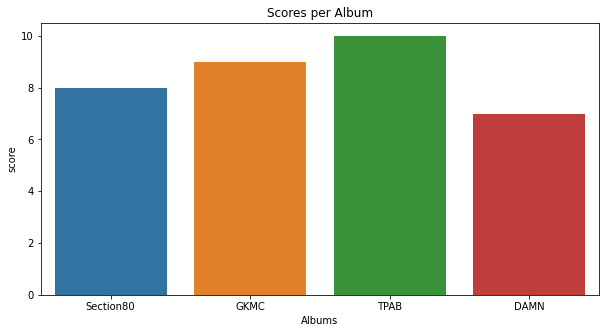

In [11]:
plt.figure(figsize = (10, 5))
sns.barplot(x = tk["Albums"], y = tk["score"]).set_title("Scores per Album")

In [12]:
#WORD LENGTHS

Text(0.5, 1.0, 'Words in Each Review')

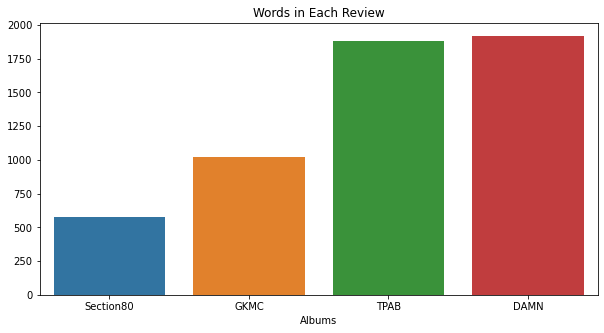

In [13]:
plt.figure(figsize = (10, 5))
sns.barplot(x = tk["Albums"], y = [len(x) for x in tk["Word_List"]]).set_title("Words in Each Review")

In [15]:
#Freq Dist

Text(0.5, 1.0, 'Unique Words Ratio')

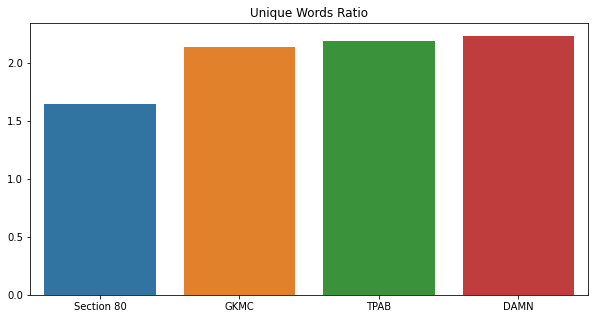

In [14]:
names = ['Section 80', 'GKMC', 'TPAB', 'DAMN']
def uniqueWords(text):
    textSet = set(text)
    return len(text)/len(textSet)

plt.figure(figsize = (10, 5))
sns.barplot(x = names, y = [uniqueWords(x) for x in tk["Word_List"]]).set_title("Unique Words Ratio")

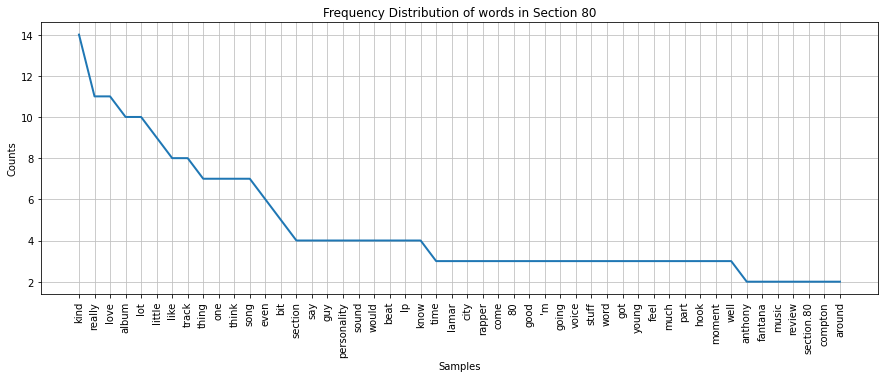

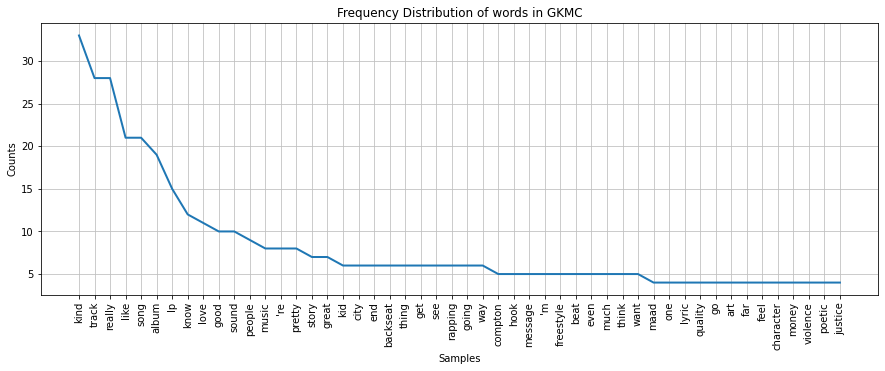

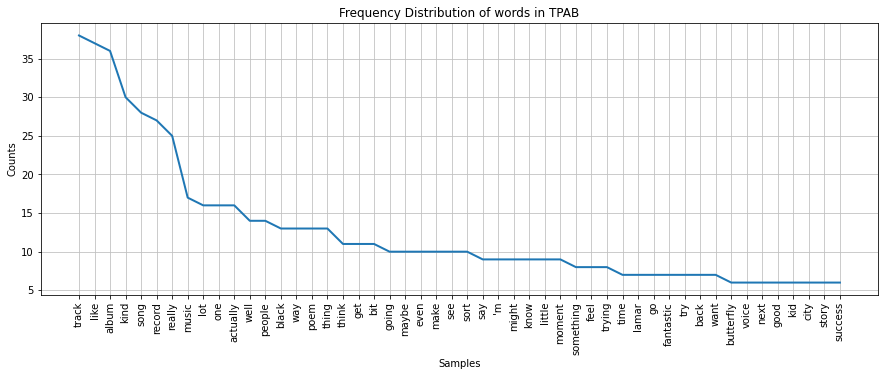

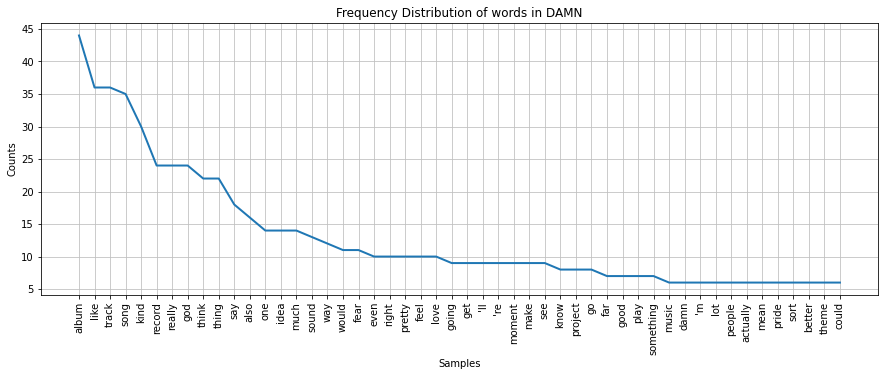

In [15]:

from nltk.probability import FreqDist
from matplotlib.pyplot import figure

def freq(text, x):
    figure(figsize = (15, 5))
    fdist = FreqDist(text)
    fdist.plot(50, cumulative = False, title = "Frequency Distribution of words in " + names[x])
    plt.show()

for x in range(4):
        freq(tk["Word_List"][x], x)


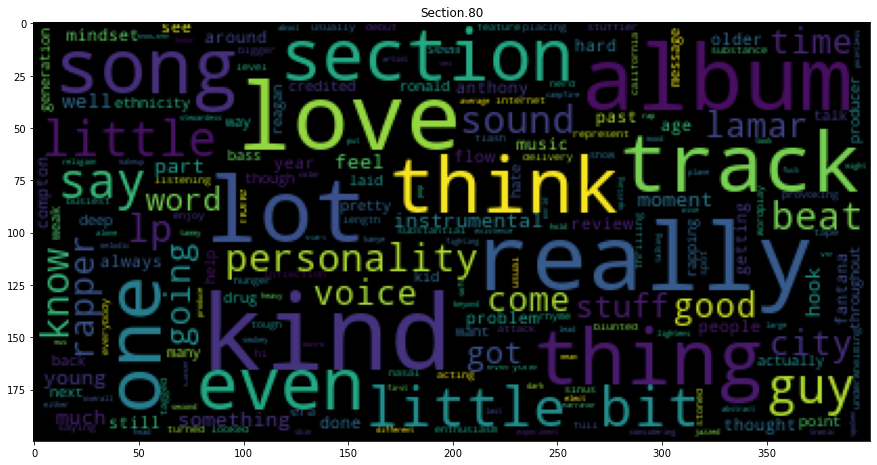

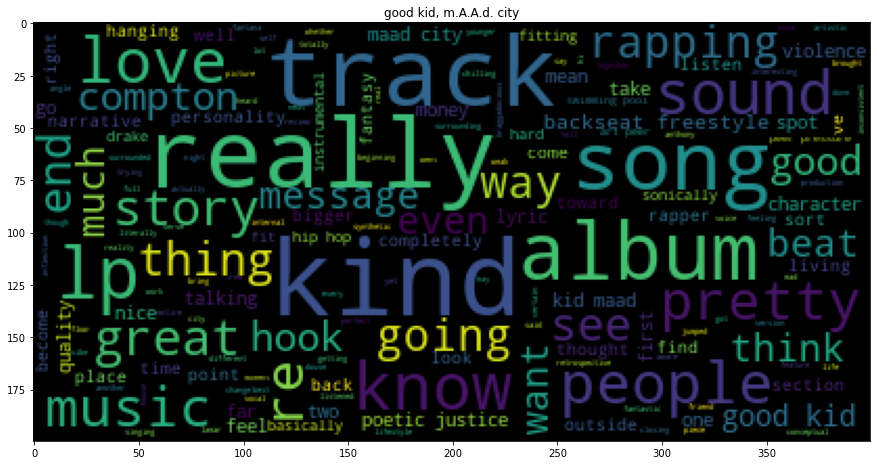

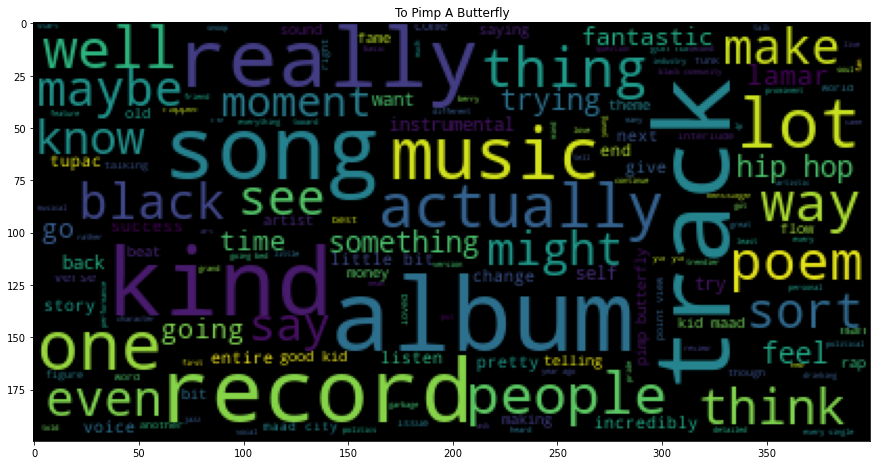

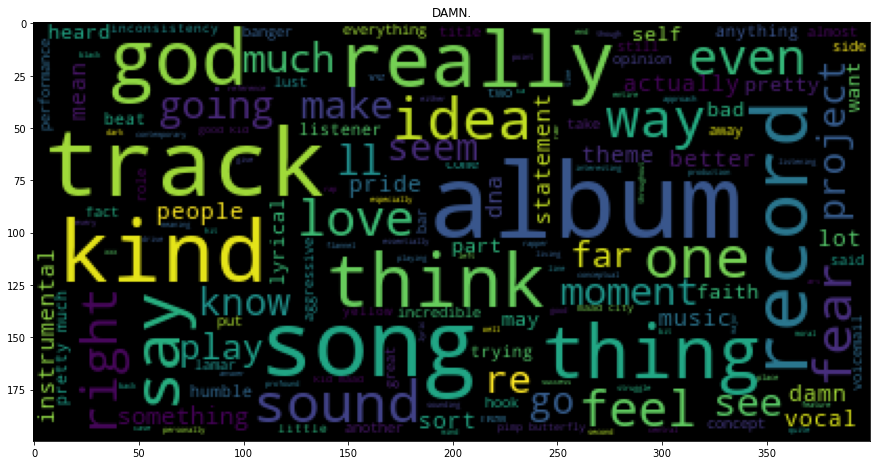

In [18]:
from wordcloud import WordCloud

for x in range(4):
    string = tk["Word_List"][x]
    wordcloud = WordCloud(max_font_size = 50).generate((" ").join(string))
    figure(figsize = (15, 10))
    plt.title(tk["title"][x])
    plt.imshow(wordcloud)

In [16]:
#Finally on to the sentiment analysis.

from textblob import TextBlob

pol = lambda x : TextBlob(x).sentiment.polarity         #Polarity of the captions. It shows whether the text is positive or negative.
sub = lambda x : TextBlob(x).sentiment.subjectivity     #Subjectivity shows how opinionated the text is.

tk["polarity"] = tk["Captions"].apply(pol)
tk["subjectivity"] = tk["Captions"].apply(sub)

In [20]:
tk

key_0  Unnamed: 0                    title          artist review_date  \
0    233         233               Section.80  Kendrick Lamar  2011-07-10   
1    510         510  good kid, m.A.A.d. city  Kendrick Lamar  2012-10-22   
2   1042        1042      To Pimp A Butterfly  Kendrick Lamar  2015-03-18   
3   1485        1485                    DAMN.  Kendrick Lamar  2017-04-18   

  review_type  score word_score  \
0       Album    8.0        NaN   
1       Album    9.0        NaN   
2       Album   10.0        NaN   
3       Album    7.0        NaN   

                                         best_tracks  \
0  ['FUCK YOUR ETHNICITY ', 'RONALD REAGAN ERA ',...   
1  ['BACKSEAT FREESTYLE ', 'MONEY TREES ', 'POETI...   
2  ["WESLEY'S THEORY ", 'FOR FREE ? ', 'KING KUNT...   
3  ['HUMBLE ', 'DNA ', 'ELEMENT ', 'LUST ', 'PRID...   

                                         worst_track  \
0                                 THE SPITEFUL CHANT   
1                      REAL ( IF I HAD TO PICK ONE )   
2  UHHHHHHHHHHHHHHHHH ... I GUESS YOU AIN'T GOTTA...   
3                                               LOVE   

                                          link     Albums  \
0  https://www.youtube.com/watch?v=1nYHyZgD5zM  Section80   
1  https://www.youtube.com/watch?v=VUUxtEQLAiQ       GKMC   
2  https://www.youtube.com/watch?v=qTmHuavOXNg       TPAB   
3  https://www.youtube.com/watch?v=RIGINiBYxis       DAMN   

                                            Captions  \
0  section 8 hi everyone Anthony Fantana here the...   
1  hi Bert hi everyone Anthony Fantana here thank...   
2  BAM hey everyone Anthony Fantana here the Inte...   
3  hi everyone finally here Tanner here the Inter...   

                                           Word_List  polarity  subjectivity  
0  [section, 8, hi, everyone, anthony, fantana, i...  0.207867      0.543834  
1  [hi, bert, hi, everyone, anthony, fantana, tha...  0.258680      0.604994  
2  [bam, hey, everyone, anthony, fantana, interne...  0.177346      0.518400  
3  [hi, everyone, finally, tanner, internet, busi...  0.123641      0.541045

In [17]:

#A graphical representation of polarity and subjectivity across four of the reviews.

import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = [10, 8]
fig = go.Figure(data=[go.Scatter(
    x=tk["subjectivity"], y=tk['polarity'],
    mode='markers',
    marker = dict(
    color = ["brown", "purple", "black", "red"]),
    text = tk["title"],
    marker_size=tk['score']*5)
])

fig.update_layout(
    title = "Sentiment Analysis of Kendrick Lamar's Needledrop Reviews",
    xaxis = dict(
    title = "<-- Factual ------------------------------------------ Opinionated -->"),
    yaxis = dict(
    title = "<-- Negative ----------------- Positive -->")
)
    

fig.show()

## Key Takeaways

Generally, Fantano's reviews are positive. DAMN is least positive. This doesn't come as a surprise as it was rated the lowest as well among his other reviews. The GKMC review seems to be relatively highly opinionated as opposed to the TPAB review. 

# A Wholistic Analysis

Now let's see Anthony's sentiments across all of his music reviews.

In [23]:
dfMain = pd.merge(df_rev, df_cap)

In [34]:
dfMain['caption'] = dfMain['caption'].apply(str)
dfMain["polarity"] = dfMain["caption"].apply(pol)
dfMain["subjectivity"] = dfMain["caption"].apply(sub)

Unnamed: 0                        title            artist review_date  \
0              0                  Cosmogramma      Flying Lotus  2010-05-05   
1              1                       Throat      Little Women  2010-05-09   
2              2                        Latin         Holy Fuck  2010-05-10   
3              3                  High Violet      The National  2010-05-11   
4              4                 At Echo Lake             Woods  2010-05-12   
...          ...                          ...               ...         ...   
1613        1729  Tell Me How You Really Feel  Courtney Barnett  2018-05-22   
1614        1730                  Wide Awake!    Parquet Courts  2018-05-23   
1615        1731                 Mark Kozelek      Mark Kozelek  2018-05-25   
1616        1732                      DAYTONA           Pusha T  2018-05-28   
1617        1733                    Communion         Park Jiha  2018-05-29   

     review_type  score word_score  \
0          Album    8.0        NaN   
1          Album    9.0        NaN   
2          Album    7.0        NaN   
3          Album    6.0        NaN   
4          Album    8.0        NaN   
...          ...    ...        ...   
1613       Album    6.0        NaN   
1614       Album    9.0        NaN   
1615       Album    7.0        NaN   
1616       Album    8.0        NaN   
1617       Album    6.0        NaN   

                                            best_tracks  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                    []   
4                                                    []   
...                                                 ...   
1613  ['NEED A LITTLE TIME ; CITY LOOKS PRETTY ; NAM...   
1614  ['VIOLENCE ', 'BEFORE THE WATER GETS TOO HIGH ...   
1615  ['THIS IS MY TOWN ', 'LIVE IN CHICAGO ', 'THE ...   
1616  ['IF YOU KNOW YOU KNOW ', 'THE GAMES WE PLAY '...   
1617  ['THROUGHOUT THE NIGHT ', 'COMMUNION ', "ALL S...   

                worst_track                                         link  \
0                       NaN  https://www.youtube.com/watch?v=KCuamde9Atc   
1                       NaN  https://www.youtube.com/watch?v=cndwH6byJnk   
2                       NaN  https://www.youtube.com/watch?v=ySXryTlo9Ac   
3                       NaN  https://www.youtube.com/watch?v=DuMUDldrG3g   
4                       NaN  https://www.youtube.com/watch?v=ncrpTX6jR5w   
...                     ...                                          ...   
1613  WALKIN ' ON EGGSHELLS  https://www.youtube.com/watch?v=GkeHYp7MASY   
1614          BACK TO EARTH  https://www.youtube.com/watch?v=4ZZREmYnygU   
1615     YOUNG RIDDICK BOWE  https://www.youtube.com/watch?v=HMIUSLOR350   
1616             HARD PIANO  https://www.youtube.com/watch?v=z605Rm7lFTM   
1617   ACCUMULATION OF TIME  https://www.youtube.com/watch?v=icib8b4GYlI   

                                                caption  polarity  \
0     Flying Lotus Cosmo Rama all right my needle dr...  0.196717   
1     hey my needle drops Anthony Fantino here Inter...  0.087543   
2     hello my needle drops Anthony Fantana here Int...  0.137230   
3     the national hi violet hi everyone Anthony Fan...  0.208694   
4     woods at Echo Lake yo needle drops Anthony Fan...  0.146174   
...                                                 ...       ...   
1613  hi everyone choppin each opt-in oh here the In...  0.232894   
1614  hi everyone yes that a yes Tanna here the Inte...  0.200706   
1615  Oh Panera theny brevet Anna here the Internet'...  0.162933   
1616  hi everyone Anthony Fantana here Internet's bu...  0.209256   
1617  ah hi everyone Anthony Fantana here Internet's...  0.237632   

      subjectivity  
0         0.484760  
1         0.514331  
2         0.470000  
3         0.510594  
4         0.534919  
...            ...  
16

In [42]:
# will take time to load.
fig = px.scatter(dfMain, x="subjectivity", y="polarity", color="artist",
                 hover_name="title")
fig.show()